# Recommender Systems


recommmendation system: presents items to users in a relevant way

user: party that is receiving Recommendations
item: the passive party that is being recommended to users  

Content based vs collaborative filtering
In practice most will be hybrid.


## Recommendations at Expedia Group

### EPS

https://confluence.expedia.biz/pages/viewpage.action?pageId=890552932

https://www.dropbox.com/s/cf77o15jlahabay/wid-eps-recommendations.pdf

### BEX?

### Hcom?


## Collaborative Filtering

* Memory Based - KNearest Neighbours
* Model Based - SVD
* and others



## K Nearest Neighbours

In [25]:
import pandas as pd

def display_matrix(data):
  df = pd.DataFrame(data) 
  df.rename(columns=lambda x: "item" + str(x), inplace=True)
  df.rename(index = lambda x: "user" + str(x), inplace=True)
  return df


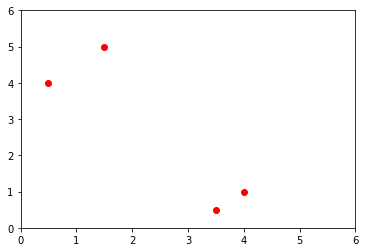

In [26]:
from scipy import spatial
import matplotlib.pyplot as plt
import itertools
from sklearn.neighbors import NearestNeighbors
import math


def points(xs):
    return [[x[0] for x in xs],[x[1] for x in xs]]

def plot(xs):
    ps = points(xs)
    plt.plot(ps[0],ps[1], 'ro')
    mx = max([max(ps[0]), max(ps[1])])
    mn = min([min(ps[0]), min(ps[1]), 0])
    gap = math.ceil((mx - mn) / 10)
    plt.axis([mn, mx + gap, mn, mx + gap])


# https://realpython.com/build-recommendation-engine-collaborative-filtering/
# conceptually we can say that these are users with explicit ratings for movies x and y
# or we could say that they're
pts = [
    [4, 1],
    [3.5, 0.5],
    [0.5, 4],
    [1.5, 5]
]

plot(pts)

In [27]:
display_matrix(pts)

,item0,item1
user0,4.0,1.0
user1,3.5,0.5
user2,0.5,4.0
user3,1.5,5.0


In [28]:
#User-based collaborative filtering:
#Find the users who have similar taste of products as the current user , similarity is based on purchasing behavior of the user, so based on the neighbor purchasing behavior we can recommend items to the current user.

# Let's build up intuitions
# Lets add a new user who gave movie x a certain rating but hasn't given one for movie y; what rating will she give to movie y?
# Let's say that her rating will be the average of the ratings given by the nearest 2 users for movie y
# TBD
def predicted_rating(x, pts):
    nearest_users = None
    return 0.0


# problems with this?

In [29]:
# now let's see if we can try using sklearn's nearest neighbour's library
neigh = NearestNeighbors(n_neighbors=2, metric='euclidean')
neigh.fit(pts)

print(neigh.kneighbors([[4,1]]))

print(neigh.kneighbors([[4,1.1]]))

print(neigh.kneighbors([[5,2]]))

print(neigh.kneighbors([[0,0.25]]))

# what's wrong with the result here?

(array([[0.        , 0.70710678]]), array([[0, 1]]))
(array([[0.1       , 0.78102497]]), array([[0, 1]]))
(array([[1.41421356, 2.12132034]]), array([[0, 1]]))
(array([[3.50891721, 3.78318649]]), array([[1, 2]]))


In [30]:
def normalise(x):
    avg = (x[0] + x[1]) / 2
    return [x[0] - avg, x[1] - avg]

neigh = NearestNeighbors(n_neighbors=2)
neigh.fit([normalise(pt) for pt in pts])
neigh.kneighbors([[0.1,0]])


(array([[2.05182845, 2.05182845]]), array([[0, 1]]))

In [31]:
# let's add some items and introduce some sparsity
pts = [
    [4, 1, None, None],
    [3.5, 0.5, None, 2],
    [None, None, 3, 4],
    [0.5, 4, None, None],
    [1.5, 5, None, None]
]
display_matrix(pts)

,item0,item1,item2,item3
user0,4.0,1.0,NaN,NaN
user1,3.5,0.5,NaN,2.0
user2,NaN,NaN,3.0,4.0
user3,0.5,4.0,NaN,NaN
user4,1.5,5.0,NaN,NaN


In [33]:
def normalise(xs):
    nxs = list(filter(lambda x: x is not None, xs))
    avg = sum(nxs) / len(nxs)
    return [0.0 if x is None else x - avg for x in xs]



In [35]:
# TDB: write a function to predict ratings for a new entry 
def predicted_rating(x, pts):
  return 0.0